### DATA305 Assignment 1: Problem 5.
- Name: Armand Faris A Surbakti
- Student ID: 300680133

In [5]:
#import sklearn libraries
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from random import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
#read and load data
df = pd.read_csv('HeartData.csv', header=0)
df

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,0,0,0,1,0,0,45.0,55,132,1.00,543000.00,582
295,244,0,0,0,1,0,0,51.0,40,134,0.90,221000.00,582
296,14,1,1,0,0,0,0,45.0,14,127,0.80,166000.00,582
297,80,0,1,0,1,0,0,60.0,45,133,1.00,297000.00,897


In [7]:
#drop first columns
df.drop(columns=[df.columns[0]], inplace=True)

### EDA
Below is my implementation of EDA (Exploratory Data Anaysis). Here I'll be cleaning, plotting, and extracting valuable insights from this dataset so that it's ready to be implemented into the various methods of ensemble machine learning.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Event              299 non-null    int64  
 1   Gender             299 non-null    int64  
 2   Smoking            299 non-null    int64  
 3   Diabetes           299 non-null    int64  
 4   BP                 299 non-null    int64  
 5   Anaemia            299 non-null    int64  
 6   Age                299 non-null    float64
 7   Ejection.Fraction  299 non-null    int64  
 8   Sodium             299 non-null    int64  
 9   Creatinine         299 non-null    float64
 10  Platelets          299 non-null    float64
 11  CPK                299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [9]:
df.describe()

,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Platelets,CPK
count,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


In [10]:
#let's check for null or missing values
df.isnull().sum()

Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Platelets            0
CPK                  0
dtype: int64

In [11]:
#check for the dataset's datatypes
print(df.dtypes)

Event                  int64
Gender                 int64
Smoking                int64
Diabetes               int64
BP                     int64
Anaemia                int64
Age                  float64
Ejection.Fraction      int64
Sodium                 int64
Creatinine           float64
Platelets            float64
CPK                    int64
dtype: object


There are no empty values, so this dataset should be clean. Let's now create some visualizations of the dataset.

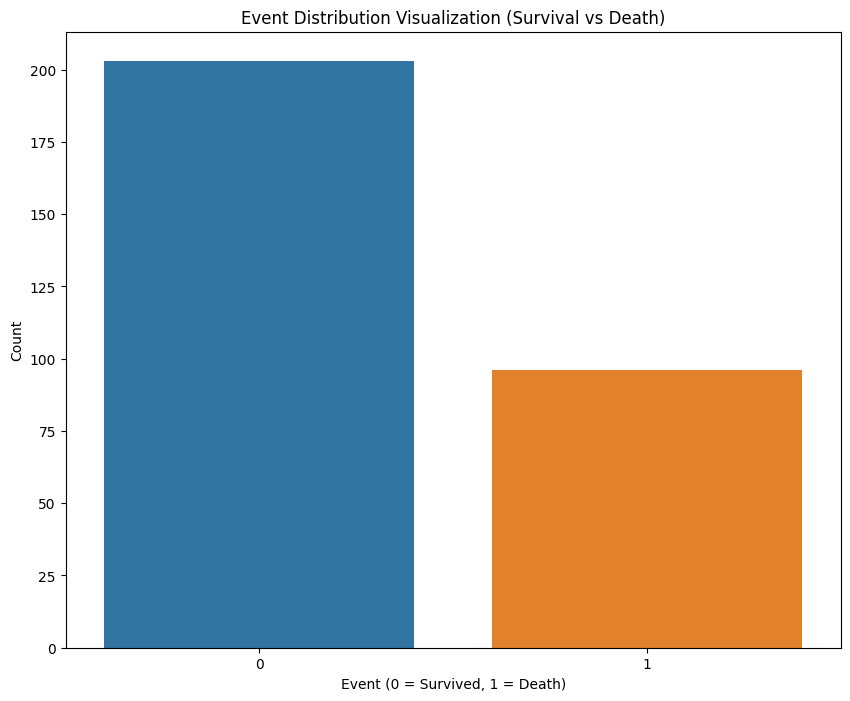

In [12]:
#create a countplot using seaborn
plt.figure(figsize=(10,8))
sns.countplot(x=df['Event'])
plt.title("Event Distribution Visualization (Survival vs Death)")
plt.xlabel("Event (0 = Survived, 1 = Death)")
plt.ylabel("Count")
plt.show()

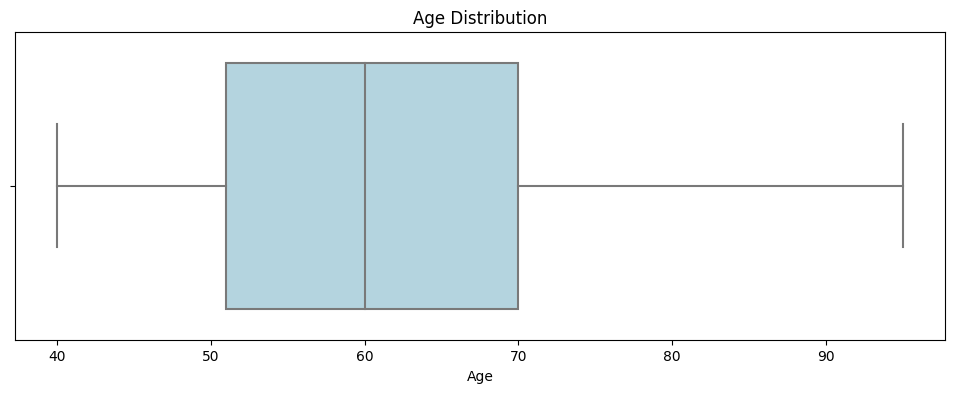

In [13]:
#Let's now create a boxplot to see information about age distribution
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['Age'], color='lightblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

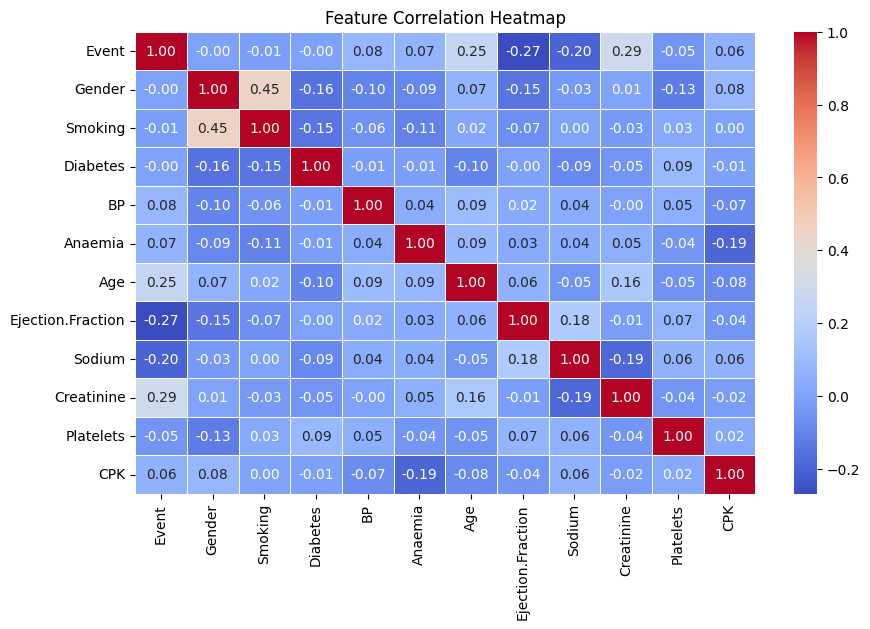

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Data Processing, and Pipeline Creation

In [15]:
#Here, we extract the features and then the target variable. 
X = df.drop(columns=['Event'])
y = df['Event']

In [35]:
#split the dataset into training and testing sets using sklearn's train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [37]:
#identify categorical and numerical features.
categorical_cols = ['Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia']
numerical_cols = ['Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Platelets', 'CPK']

In [38]:
#Scale and transform the data using both StandardScaler for numeric data and OneHotEncoding
numeric_transformer = StandardScaler()
categorical_transform = OneHotEncoder(handle_unknown='ignore')

In [39]:
#Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transform, categorical_cols)
    ]
)

#apply the pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Training the Different Tree Models
Here I'll be applying The DecisionTree, Bagging, AdaBoost, RandomForest, and Voting Classifiers

In [73]:
#Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000),
    "Random Forest": RandomForestClassifier(n_estimators=1200),
    "AdaBoost": AdaBoostClassifier(n_estimators=1000)
}

Now let's combine all the models to be voting classifier. 

In [74]:
#create a soft voting classifier
soft_voting_clf = VotingClassifier(
    estimators=[
        ("DecisionTree", DecisionTreeClassifier()),
        ("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000)), 
        ("RandomForest", RandomForestClassifier(n_estimators=1200)),
        ("AdaBoost", AdaBoostClassifier(n_estimators=1000)),
    ],
    voting="soft"
)

#create a hard voting classifier
hard_voting_clf = VotingClassifier(
    estimators=[
        ("DecisionTree", DecisionTreeClassifier()),
        ("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000)),
        ("RandomForest", RandomForestClassifier(n_estimators=1200)),
        ("AdaBoost", AdaBoostClassifier(n_estimators=1000)),
    ],
    voting="hard"
)

models["Hard Voting"] = hard_voting_clf
models["Soft Voting"] = soft_voting_clf

In [75]:

# Evaluate models using cross-validation
#create a resulst dataframe to store results
results = []

scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
}

for name, model in models.items():
    accuracy = cross_val_score(model, X_train, y_train, cv=6, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=6, scoring='precision').mean()
    recall = cross_val_score(model, X_train, y_train, cv=6, scoring='recall').mean()

    #append results to the list
    results.append([name, accuracy, precision, recall])
    

### Printing out the Final Scoring Metrics

In [76]:
#this dataframe will be a sort of table to display all the results
results_df = pd.DataFrame(
                        results, 
                columns=["Model", 
                         "Accuracy", 
                         "Precision", 
                         "Recall"]
                )
#print the table
results_df

,Model,Accuracy,Precision,Recall
0,Decision Tree,0.707158,0.490766,0.523990
1,Bagging,0.761645,0.631463,0.518939
2,Random Forest,0.748825,0.582601,0.404040
3,AdaBoost,0.707158,0.482641,0.521465
4,Hard Voting,0.744658,0.586291,0.376263
5,Soft Voting,0.736645,0.551526,0.494949
